# Information Retrieval in High Dimensional Data

# Assignment #3, 09.01.2018

# Kernel PCA (kPCA) and Fisher LDA
Group Number: G10

Group Members:
- AboulAtta Moustafa
- Achtner Martin
- Arifi Ridon
- Ehrhardt Daniel
- Fichtner Lukas

## <u>Kernel PCA (kPCA)</u>

### Task 1.1 [5 points]:

Download the file <em>task3_1_kpca_demo.py</em> from the web page. Implement KPCA using a Gaussian kernel function

\begin{equation} k(\mathbf{x}_1, \mathbf{x}_2) = exp \left(- \frac{\|\mathbf{x}_1 - \mathbf{x}_2 \|^2}{2 \sigma^2}\right), \end{equation}

by filling in the missing lines.

Vary $ alpha $ and $ sigma $ and observe the generated plots. In each of the two plots all generated data points are plotted. The color in the first plot indicates the value of the respective point when projected onto the first PC. The color in the second plot indicates the value of the respective point when projected onto the second PC.

In [1]:
# kpca_demo
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as scm

In [2]:
# data generation
np.random.seed(1234)

# the following code generates 2 dimensional data.
# specifically, for each vector the first component is between 0 and alpha,
# while the second is between 0 and 1
n = 1000                       # number of data points
alpha = 2                      # length/width ratio
s = np.array([alpha,1])
X = np.diag(s).dot(np.random.rand(2,n))          # uniformly distributed points on a rectangle

H = np.eye(n) - np.ones((n,n))/n           # create centering matrix

In [3]:
def custom_sdist(X):
    """
    Funktion that given a matrix X returns the squared pairwise distances 
    of the column vectors in matrix form
    """
    XX = np.dot(X.T, X)
    pdists = np.outer(np.diag(XX), np.ones(XX.shape[1]).T) + np.outer(np.ones(XX.shape[0]), np.diag(XX).T) - 2*XX
    return pdists

In [4]:
def K(X):
    sigma = 1
    denominator = 2*sigma**2
    K = np.exp(-(custom_sdist(X)/denominator))
    return K

In [5]:
k = 2 # number of eigenvectors
K_centered = np.dot(H, np.dot(K(X), H))

_, s, Vt = np.linalg.svd(K_centered)
s = np.sqrt(s[:k])
Y = np.dot(np.diag(s), Vt[:k,:])

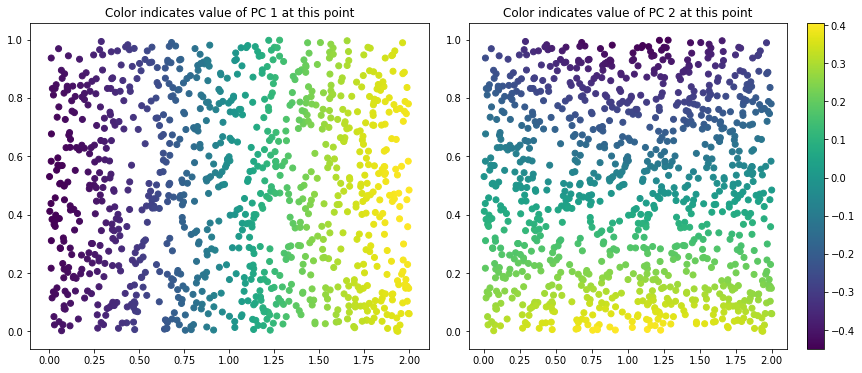

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
for ip in range(k):
    im = axs[ip].scatter(X[0,:], X[1,:], c=Y[ip,:])
    axs[ip].set_title('Color indicates value of PC {} at this point'.format(ip+1))
    
fig.colorbar(im)
plt.show()

For appropriate choices of $ alpha $ and $ sigma $ you see a horizontal separation in the first component and a vertical separation in the second component. (Note that horizontal separation means, that you can separate the different colors in the plot with vertical lines and vice versa for vertical separation.) However, if $ alpha $ becomes too large, the second component is no longer vertical. Test this behavior for $ alpha $ between 1 and 12 and determine the $ sigma $ that provides vertical separation in the second component for each $ alpha $ . Provide a 2-dimensional plot with the axis $ alpha $ and $ sigma $ to illustrate this behavior.

### Data obtained through empirical testing

<div style="text-align: center">$\begin{array}{c|c} \alpha  & \sigma \\ \hline\hline 1 & 0.5 \\
2 & 1 \\
3 & 2.5 \\ 
4 & 4.5 \\
5 & 8 \\
6 & 11 \\
7 & 14 \\
8 & 18 \\
9 & 23 \\
10 & 29 \\
11 & 34 \\
12 & 38 \\
\end{array}$</div>

<center> (Note that for $ \alpha = 1 $ the orientation of separation is switched.) </center>

In [7]:
alpha = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
sigma = np.array([0.5, 1, 2.5, 4.5, 8, 11, 14, 18, 23, 29, 34, 38])

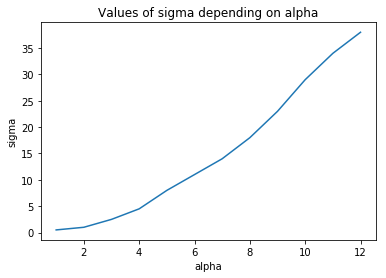

In [8]:
plt.plot(alpha, sigma)
plt.title('Values of sigma depending on alpha')
plt.xlabel('alpha')
plt.ylabel('sigma')
plt.show()

## Task 1.2 [5 points]: 

Download the python script <i>task3_1_toy_data.py</i> for generating a toy example. The produced dataset contains two groups. Implement kPCA and determine the kernel function that allows to linearly separate the data using the first principal component.

In [9]:
# Generate Data
np.random.seed(1234)
m = 50
N = 200
X = np.random.randn(2, m)/10

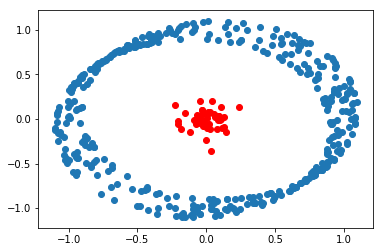

In [10]:
# Plot example data
for idx in range(N):
    t = np.random.randn(2, 2)
    tmp = t[:, 0:1]/np.linalg.norm(t[:, 0]) + t[:, 1]/np.linalg.norm(t[:, 1:2])/10
    X = np.hstack((X, tmp))
    
plt.figure()
plt.scatter(X[0, m:], X[1, m:])
plt.scatter(X[0, 1:m], X[1, 1:m], c='r')

plt.show()

In [11]:
n = 450

H = np.eye(n) - np.ones((n,n))/n           # create centering matrix

In [12]:
sigma = 0.1

def K(X):
    # Use "radial kernel"
    squares = np.sum(np.square(X), axis = 0)
    K = np.dot(np.expand_dims(squares, axis=1), np.expand_dims(squares, axis=0))
    return K

In [13]:
k = 1 # number of eigenvectors

K_centered = np.dot(H, np.dot(K(X), H))

_, s, Vt = np.linalg.svd(K_centered)
s = np.sqrt(s[:k])
Y = np.dot(np.diag(s), Vt[:k,:])

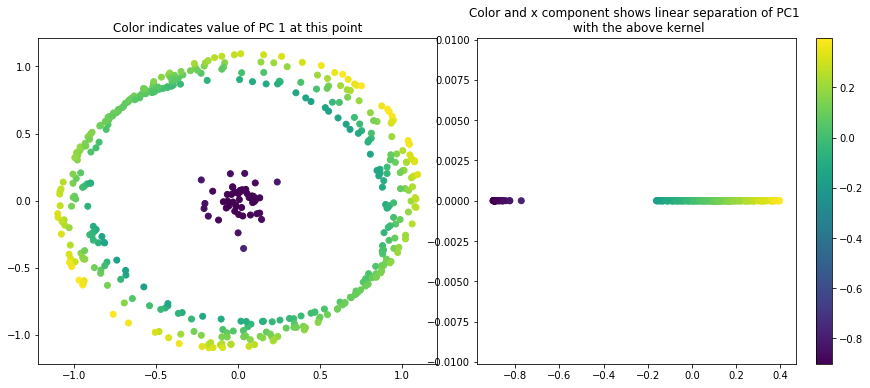

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=.5, wspace=.1)
axs = axs.ravel()
for ip in range(k):
    axs[ip].scatter(X[0,:], X[1,:], c=Y[ip,:])
    axs[ip].set_title('Color indicates value of PC {} at this point'.format(ip+1))

    im = axs[1].scatter(Y[0,:], np.zeros(Y.shape[1]), c=Y[0,:])
    axs[1].set_title('Color and x component shows linear separation of PC1 \n with the above kernel')
    
fig.colorbar(im)
plt.show()

## <u>Fisher LDA <u>

### Task 2 [10 points]:

Refer to Lab Course 7. In 1.e, we implemented LDA by normalizing the between-scatter matrix $ \mathbf{S}_b $ with the within-scatter matrix $ \mathbf{S}_w $. Another way to approach LDA is by finding the projection space spanned by the columns of

\begin{equation} \hat{\mathbf{U}} = \arg\max\limits_{\mathbf{U}^T \mathbf{U} = \mathbf{I}_k} \, \text{tr}(\mathbf{U}^T \mathbf{S}_b \mathbf{U}) - \beta\, \text{tr}(\mathbf{U}^T \mathbf{S}_w \mathbf{U}), \end{equation}

and projecting the data onto that space. Here, $ \beta $ is a real positiv tuning parameter to be chosen by hand.

+ Explain, how you can solve this problem by EVD

$ \rightarrow $ Since the trace is a linear operation we can rewrite the equation as:

\begin{equation} \hat{\mathbf{U}} = \arg\max\limits_{\mathbf{U}^T \mathbf{U} = \mathbf{I}_k} \, \text{tr}(\mathbf{U}^T \mathbf{S}_b \mathbf{U} - \beta\,(\mathbf{U}^T \mathbf{S}_w \mathbf{U})) \end{equation}

after factoring out $ \mathbf{U}^T $ and $ \mathbf{U} $ the equation denotes to 

\begin{equation} \hat{\mathbf{U}} = \arg\max\limits_{\mathbf{U}^T \mathbf{U} = \mathbf{I}_k} \, \text{tr}(\mathbf{U}^T( \mathbf{S}_b - \beta\,\mathbf{S}_w) \mathbf{U})) \end{equation}

Taking the EVD of the scatter matrices

\begin{equation} \mathbf{S}_b - \beta\,\mathbf{S}_w = \mathbf{V} \mathbf{\Lambda} \mathbf{V}^T \end{equation}

one can see that the equation is maximized by setting $ \mathbf{U} = \mathbf{V} $.   
(Refer to PCA for further proof).

+ Provide PYTHON code that creates the plots in accordance wiith the lab course by performing the dimensionality reduction with the described approach. In particular, choose $ k = 2 $ for the subspace dimension.

+ Choose 1, 2 and 3 as the digit classes and 1 to 1000 as the training samples from each class.

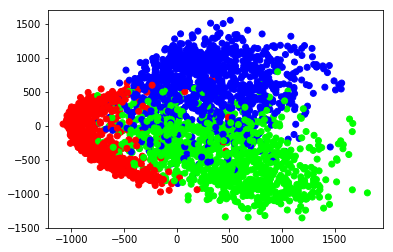

In [15]:
N=1000
digit_prefix=['d1','d2','d3']
X=np.zeros((784,3*N))
C=np.zeros((3*N,3))
for i,dp in enumerate(digit_prefix):
    val_rgb=np.zeros((3,))
    val_rgb[i]=1.0
    for j in range(N):
        X[:,i*N+j]=np.float64(scm.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        C[i*N+j]=val_rgb
        
mu=np.mean(X,axis=1)
X_c=X-np.expand_dims(mu,axis=1) # expand dims to ensure correct broadcasting

[U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)

Scores=np.expand_dims(Sigma,axis=1)*VT

#reorder indexes for visualization purposes
idx_new=((np.arange(3*N).reshape(3,N).T).reshape(N,3)).ravel()
plt.scatter(Scores[0,idx_new],Scores[1,idx_new],c=C[idx_new])
plt.show()

In [16]:
X_1=X[:,:N]
X_2=X[:,N:2*N]
X_3=X[:,2*N:3*N]

X1c=X_1-np.expand_dims(np.mean(X_1,axis=1), 1)
X2c=X_2-np.expand_dims(np.mean(X_2,axis=1), 1)
X3c=X_3-np.expand_dims(np.mean(X_3,axis=1), 1)

S_w=(np.dot(X1c,X1c.T)+np.dot(X2c,X2c.T)+np.dot(X3c,X3c.T))

In [17]:
mu = np.mean(X, axis=1)
mu1 = np.mean(X_1, axis=1) - mu
mu2 = np.mean(X_2, axis=1) - mu
mu3 = np.mean(X_3, axis=1) - mu

Mu1 = np.dot(np.expand_dims(mu1,1), np.expand_dims(mu1.T, 0))
Mu2 = np.dot(np.expand_dims(mu2,1), np.expand_dims(mu2.T, 0))
Mu3 = np.dot(np.expand_dims(mu3,1), np.expand_dims(mu3.T, 0))

S_b = 1000*(Mu1 + Mu2 + Mu3)

+ Create four plots for $ \beta = 2 $, $ \beta = 4 $, $ \beta = 6 $ and $ \beta = 8 $, respectively. Give an interpretation of the results.

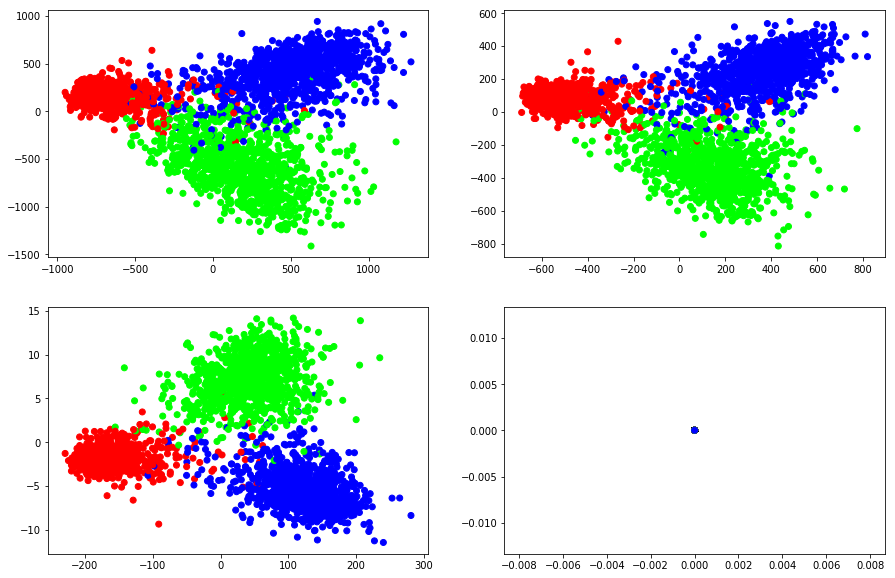

In [18]:
k = 2
betas = np.array([2, 4, 6, 8])
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
axs = axs.ravel()
for idx, beta in enumerate(betas):
    eigenvalues, V = np.linalg.eigh(S_b - beta*S_w)
    V = np.flip(V, axis = 1)
    U = V[:, :k]
    S = np.dot(U.T, X_c)
    axs[idx].scatter(S[0, idx_new], S[1, idx_new], c = C[idx_new])
    
plt.show()

As you can see, with growing $ \beta $, the classes are separated better. (For $ \beta \in [2, 4, 6] $)   
Furthermore, the absolute value of the reduced data decreases rapidly.
For $ \beta $ greater than 6, the first two positive eigenvalues become very small, and for $ \beta = 8 $ the positive eigenvalues are of the magnitude $ 10^{-7} $.  
Since $ \beta $ is a tuning parameter, we would choose it to be 6, because then the centers of the projected data are furthest away from each other and we could still apply a classifiction algorithm.

In [19]:
# Examine eigenvalues
eigenvalues, V = np.linalg.eigh(S_b - 8*S_w, UPLO='L')
eigenvalues = eigenvalues[::-1]
eigenvalues[:k]

array([  3.70740948e-07,   3.55661168e-07])